In [1]:
# https://data.world/aaizemberg/absenteeismatwork/workspace/file?filename=Absenteeism_at_work.tsv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle 

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read csv file and convert to dataframe
data = pd.read_csv('../data/Absenteeism_at_work2.csv')
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [3]:
data.shape

(740, 21)

<AxesSubplot:>

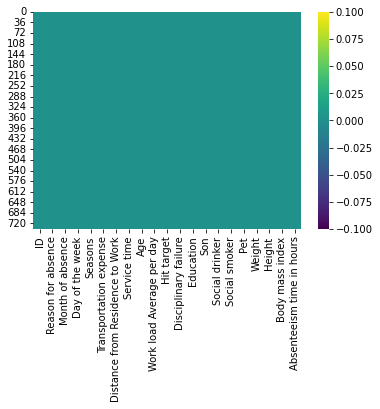

In [4]:
# Check for null value
sns.heatmap(data.isnull(), cmap='viridis')

In [5]:
# Rename columns
data = data.rename(columns={"Distance from Residence to Work": "Distance", "Reason for absence": "Reasons",
                            "Month of absence": "Month", "Day of the week": "DayNbr",
                            "Transportation expense": "Travel_expense", "Service time": "Service_time", 
                            "Work load Average per day": "Average_daily_workload", 
                            "Disciplinary failure" : "Discip_failures","Social drinker":"Social_drinker",
                            "Social smoker" : "Social_smoker", "Body mass index": "BMI",
                            "Absenteeism time in hours": "Total_hrs_absence","Hit target": "Hit_target"
                           })
data

,ID,Reasons,Month,DayNbr,Seasons,Travel_expense,Distance,Service_time,Age,Average_daily_workload,...,Discip_failures,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,BMI,Total_hrs_absence
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [6]:
# df.to_csv("../data/absenteeism_clean.csv", index=False)

In [7]:
data.drop(columns=["ID"])

,Reasons,Month,DayNbr,Seasons,Travel_expense,Distance,Service_time,Age,Average_daily_workload,Hit_target,Discip_failures,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,BMI,Total_hrs_absence
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,14,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30,8
736,11,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,88,172,29,4
737,0,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34,0
738,0,0,4,2,231,35,14,39,271.219,95,0,1,2,1,0,2,100,170,35,0


In [8]:
df=[]
df = data.copy()
df.head(3)


,ID,Reasons,Month,DayNbr,Seasons,Travel_expense,Distance,Service_time,Age,Average_daily_workload,...,Discip_failures,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,BMI,Total_hrs_absence
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2


In [9]:
df.shape

(740, 21)

In [10]:
df.describe()

,ID,Reasons,Month,DayNbr,Seasons,Travel_expense,Distance,Service_time,Age,Average_daily_workload,...,Discip_failures,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,BMI,Total_hrs_absence
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


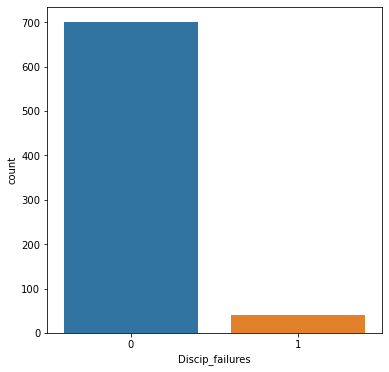

In [11]:
# Check count for Discip_failures
plt.subplots(figsize=(6, 6))
sns.countplot(df["Discip_failures"])
plt.show()

In [12]:
# Compute the correlation matrix
corr = df.corr()
# print(corr)

<AxesSubplot:>

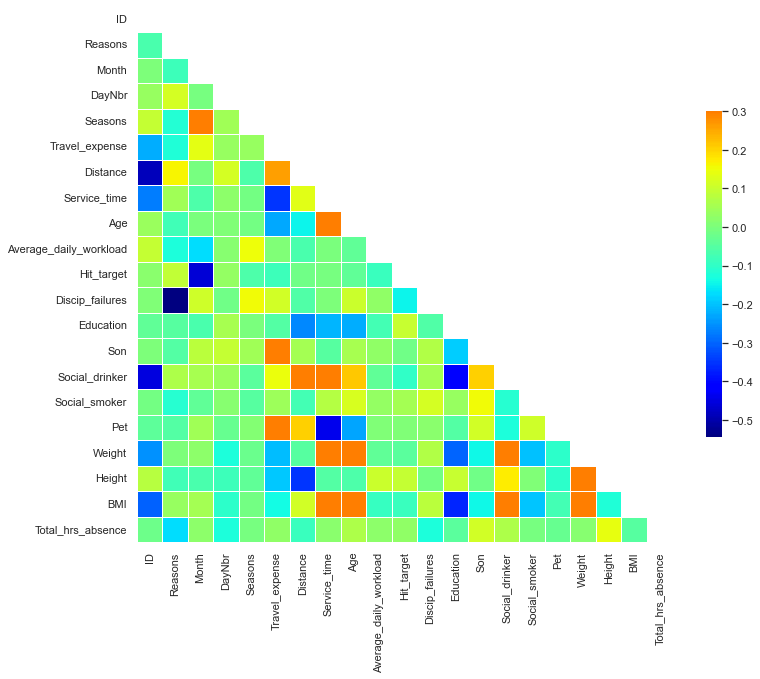

In [13]:
# Generate a mask for the upper triangle
sns.set(style="white")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="jet", vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
# Train the model to predict the Discipline_failures
y = df["Discip_failures"]
X = df.drop(columns=["Discip_failures"])
print(X.shape, y.shape)

(740, 20) (740,)


## Build & find the best fit ML model by using various algorithms

Feature: 0, Score: -0.00078
Feature: 1, Score: -0.01515
Feature: 2, Score: -0.00402
Feature: 3, Score: 0.00409
Feature: 4, Score: 0.02489
Feature: 5, Score: 0.00005
Feature: 6, Score: -0.00019
Feature: 7, Score: -0.00742
Feature: 8, Score: 0.00257
Feature: 9, Score: -0.00039
Feature: 10, Score: -0.00592
Feature: 11, Score: -0.02105
Feature: 12, Score: 0.00500
Feature: 13, Score: 0.03066
Feature: 14, Score: 0.08385
Feature: 15, Score: -0.01320
Feature: 16, Score: 0.01016
Feature: 17, Score: -0.00951
Feature: 18, Score: -0.02488
Feature: 19, Score: -0.00380


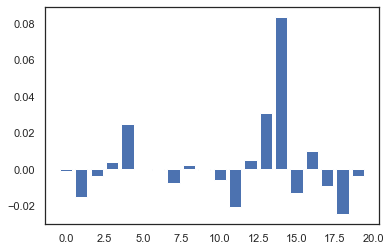

In [15]:
# Model 1: Linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.10010
Feature: 1, Score: -1.71574
Feature: 2, Score: 0.61509
Feature: 3, Score: -0.05660
Feature: 4, Score: 0.14312
Feature: 5, Score: 0.00881
Feature: 6, Score: -0.06132
Feature: 7, Score: 0.07855
Feature: 8, Score: -0.18636
Feature: 9, Score: 0.01632
Feature: 10, Score: 0.25859
Feature: 11, Score: -0.03206
Feature: 12, Score: -0.02119
Feature: 13, Score: 0.05947
Feature: 14, Score: 0.09084
Feature: 15, Score: -0.19496
Feature: 16, Score: 0.00697
Feature: 17, Score: -0.16509
Feature: 18, Score: 0.11260
Feature: 19, Score: -1.10105


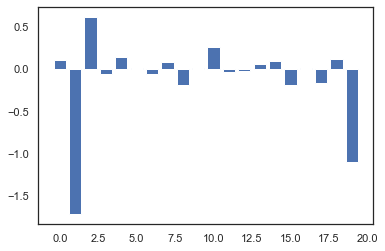

In [16]:
# Model 2: Logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.92625
Feature: 2, Score: 0.07375
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000


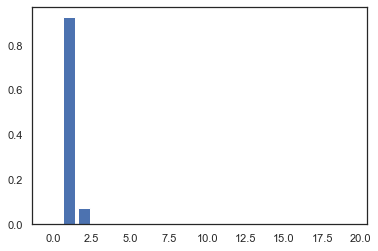

In [17]:
# Model 3: Decision tree regressor for feature importance on a regression problem 
# Using CART feature Importance, CART = Classification and regression trees
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor

# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.92625
Feature: 2, Score: 0.07375
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000


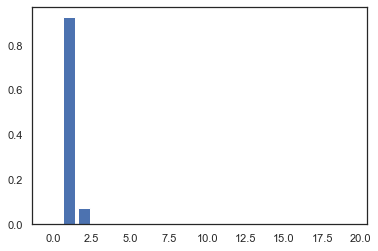

In [19]:
# Model 4: Decision tree classifier for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.77658
Feature: 2, Score: 0.07128
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00215
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00189
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.14809


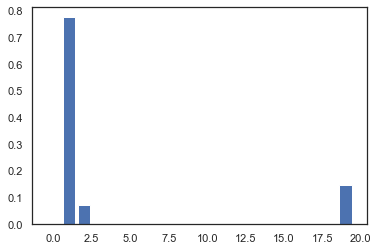

In [20]:
# Model 5: Random forest regressor for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor

# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.00965
Feature: 1, Score: 0.38449
Feature: 2, Score: 0.02864
Feature: 3, Score: 0.00955
Feature: 4, Score: 0.01028
Feature: 5, Score: 0.01475
Feature: 6, Score: 0.00822
Feature: 7, Score: 0.00463
Feature: 8, Score: 0.01264
Feature: 9, Score: 0.01905
Feature: 10, Score: 0.01458
Feature: 11, Score: 0.00109
Feature: 12, Score: 0.00268
Feature: 13, Score: 0.00188
Feature: 14, Score: 0.00272
Feature: 15, Score: 0.01076
Feature: 16, Score: 0.01151
Feature: 17, Score: 0.00721
Feature: 18, Score: 0.01509
Feature: 19, Score: 0.43058


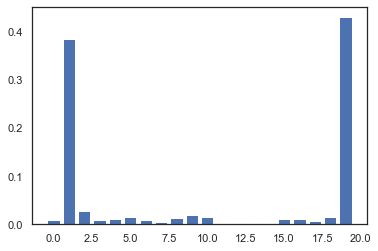

In [21]:
# Model 6: Random forest classifier for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [22]:
# !pip install xgboost

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.92668
Feature: 2, Score: 0.07332
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000


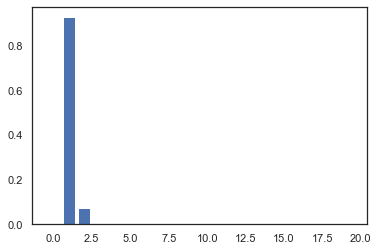

In [23]:
# Model 7: Xgboost regressor for feature importance on a regression problem
import xgboost
from sklearn.datasets import make_regression
from xgboost import XGBRegressor

# define the model
model = XGBRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.00057
Feature: 1, Score: 0.87226
Feature: 2, Score: 0.04147
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00866
Feature: 5, Score: 0.01484
Feature: 6, Score: 0.00392
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00499
Feature: 9, Score: 0.01645
Feature: 10, Score: 0.00331
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.01720
Feature: 16, Score: 0.00104
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.01528
Feature: 19, Score: 0.00000


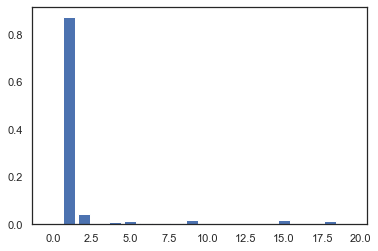

In [24]:
# Model 8: Xgboost classifier for feature importance on a classification problem
from sklearn.datasets import make_classification
from xgboost import XGBClassifier

# define the model
model = XGBClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: -0.00008
Feature: 1, Score: 0.02171
Feature: 2, Score: -0.00017
Feature: 3, Score: 0.00016
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01709
Feature: 6, Score: -0.00003
Feature: 7, Score: 0.00010
Feature: 8, Score: -0.00010
Feature: 9, Score: 0.00706
Feature: 10, Score: -0.00048
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: -0.00003
Feature: 16, Score: 0.00366
Feature: 17, Score: -0.00006
Feature: 18, Score: -0.00010
Feature: 19, Score: 0.00078


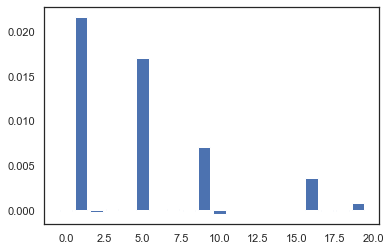

In [25]:
# Model 9: Permutation regressor feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

# define the model
model = KNeighborsRegressor()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.00297
Feature: 1, Score: 0.02486
Feature: 2, Score: -0.00054
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01622
Feature: 6, Score: 0.00324
Feature: 7, Score: 0.00081
Feature: 8, Score: 0.00054
Feature: 9, Score: 0.01054
Feature: 10, Score: 0.00054
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00027
Feature: 16, Score: 0.01054
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00027
Feature: 19, Score: 0.00324


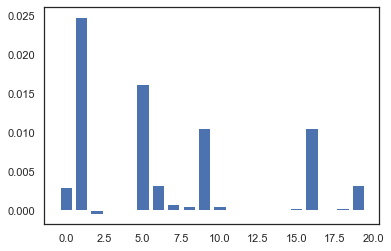

In [26]:
# Model 10: Permutation classifier feature importance with knn for classification
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

# define the model
model = KNeighborsClassifier()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [27]:
# Model 11: Feature selection with importance - Evaluation of a model using all features for regression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 99.18


In [28]:
# Model 12: Random forest feature importance for features selection for classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectFromModel(RandomForestClassifier(max_features=20))
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 100.00


## Save the model using pickle

In [29]:
# Create pickle file
import pickle 
knnPickle = open('RFmodel_absence_discipline_prediction', 'wb') 

# Save the trained model with the highest accuracy (i.e. Model 12) to file 
pickle.dump(fs, knnPickle)     
knnPickle.close()

## Load the model using pickle

In [33]:
# load the model from disk using pickle
loaded_model = pickle.load(open('RFmodel_absence_discipline_prediction', 'rb'))
print(loaded_model)

SelectFromModel(estimator=RandomForestClassifier(max_features=20))


### Since the dataset contains too many columns and hence it's not practical to develop a front end app for requesting user input to validate the trained model. 

### This dataset is only good for analysing different methodologies, libraries and approaches of machine learning to achieve the best prediction and accuracy score.